In [1]:
%pylab inline
import scipy.stats
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## 1) Prediction

1) Calculate probability in each distribition.
2) Calculate pmf (K=2) for each distribution (healthy and sick).
3) Apply Bayes probability of P(Alive\nodes = 2)

Geometric Mean of "successes": 1/p

mean alive: 2.8 = 1/p    ,   p = 1/2.8

mean dead: 7.5 = 1/p   ,   p = 1/7.5

In [15]:
#mean = 1/P    ,   mean_died = 7.5   , mean_alive = 2.8
p_died = 1/7.5
p_alive = 1/2.8

In [3]:
# x = np.arange(scipy.stats.geom.ppf(0.01, p_died),
#               scipy.stats.geom.ppf(0.99, p_died))

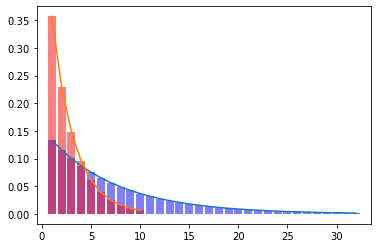

In [36]:
x = np.arange(scipy.stats.geom.ppf(0.01, p_died),
              scipy.stats.geom.ppf(0.99, p_died))
plt.plot(x, scipy.stats.geom.pmf(x, p_died), ms = 8, label = 'geom pmf')
plt.vlines(x, 0 , scipy.stats.geom.pmf(x, p_died), colors = 'b', lw = 8, alpha = 0.5)

x = np.arange(scipy.stats.geom.ppf(0.01, p_alive),
              scipy.stats.geom.ppf(0.99, p_alive))
plt.plot(x, scipy.stats.geom.pmf(x, p_alive), ms = 8, label = 'geom pmf')
plt.vlines(x, 0 , scipy.stats.geom.pmf(x, p_alive), colors = 'r', lw = 8, alpha = 0.5)

In [17]:
num_dead = 81/306
num_alive = 225/306

$$P(alive|2) = \frac{P(alive)P(2|alive)}{P(2)}$$

In [8]:
def bayes(x):
    return num_alive*scipy.stats.geom.pmf(2, p_alive )/(num_alive*scipy.stats.geom.pmf(2, p_alive) + num_dead*scipy.stats.geom.pmf(2, p_died))

In [13]:
scipy.stats.geom.pmf(2, p_alive )

0.22959183673469385

In [14]:
scipy.stats.geom.pmf(2, p_died)

0.11555555555555556

In [9]:
bayes(x)

0.8466030522862046

## Likelihood

## Hypothesis

In [10]:
X = np.zeros(100)
X[:60] = 1

Y = np.zeros(150)
Y[:70] = 1

In [11]:
scipy.stats.ttest_ind(X, Y, equal_var = False)

Ttest_indResult(statistic=2.0836798828765986, pvalue=0.03837271876454776)

This Ttest statistic is the result of the formula: 

$$\frac{X1 - X2}{\frac{S^2}{n1} + \frac{S^2}{n1}}



In [12]:
nomin = X.mean() - Y.mean()
 
denom = np.sqrt((X.var(ddof = 1)/len(X) + (Y.var(ddof = 1)/len(Y)))) #ddof provides an unbiased estimator for our sample variance.

nomin/denom

2.0836798828765986

Reject the Null Hypothesis that Px = Py. 